In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pickle
from tensorflow.keras.callbacks import EarlyStopping

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
base_path = '/content/drive/My Drive/TA_OmarDhani/'

with open(base_path + 'X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open(base_path + 'X_val.pickle', 'rb') as f:
    X_val = pickle.load(f)

with open(base_path + 'X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open(base_path + 'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open(base_path + 'y_val.pickle', 'rb') as f:
    y_val = pickle.load(f)

with open(base_path + 'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)


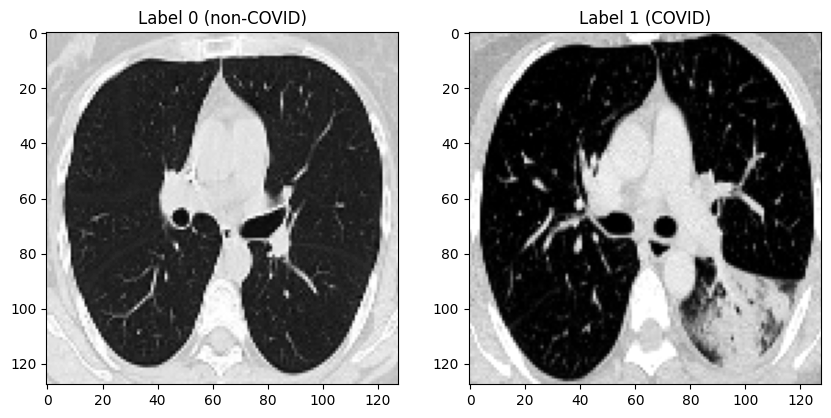

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Tampilkan contoh gambar untuk label 0 (non-COVID) dan label 1 (COVID)
def show_example_images(X, y):
    plt.figure(figsize=(10, 5))

    # Tampilkan gambar non-COVID
    non_covid_index = y.index(0)
    non_covid_image = X[non_covid_index].reshape(128, 128)
    plt.subplot(1, 2, 1)
    plt.imshow(non_covid_image, cmap='gray')
    plt.title('Label 0 (non-COVID)')

    # Tampilkan gambar COVID
    covid_index = y.index(1)
    covid_image = X[covid_index].reshape(128, 128)
    plt.subplot(1, 2, 2)
    plt.imshow(covid_image, cmap='gray')
    plt.title('Label 1 (COVID)')

    plt.show()

# Pastikan y_train adalah list
y_train = list(y_train)

show_example_images(X_train, y_train)


In [5]:
# Convert grayscale images to RGB by repeating the single channel three times
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_val_rgb = np.repeat(X_val, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)
# Ensure data is in numpy array format
X_train_rgb = np.array(X_train_rgb)
X_val_rgb = np.array(X_val_rgb)
X_test_rgb = np.array(X_test_rgb)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
# One-hot encode the labels
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Fungsi untuk membuat model CNN berdasarkan jumlah lapisan konvolusi yang dapat diubah
def create_cnn_model(num_layers):
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    for _ in range(num_layers - 1):
        model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [7]:
# Fungsi untuk melatih model dan menampilkan hasil
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluasi model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_accuracy:.2f}')

    # Prediksi
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Tampilkan classification report
    print(classification_report(y_test_classes, y_pred, zero_division=0))

    # Tampilkan confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Plot train and validation loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train and Validation Loss')

    # Plot train and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Train and Validation Accuracy')

    plt.show()


Model dengan 1 lapisan konvolusi


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.5056 - loss: 4.0109 - val_accuracy: 0.5048 - val_loss: 0.6937
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4748 - loss: 0.6942 - val_accuracy: 0.4952 - val_loss: 0.6931
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5123 - loss: 0.6931 - val_accuracy: 0.4952 - val_loss: 0.6932
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4959 - loss: 0.6932 - val_accuracy: 0.4952 - val_loss: 0.6932
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4911 - loss: 0.6932 - val_accuracy: 0.5048 - val_loss: 0.6931
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5099 - loss: 0.6931 - val_accuracy: 0.5048 - val_loss: 0.6931
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5059 - loss: 0.6932 - val_accuracy: 0.5048 - val_loss: 0.6931
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5064 - loss: 0.6931 - val_accuracy: 0.5048 - 

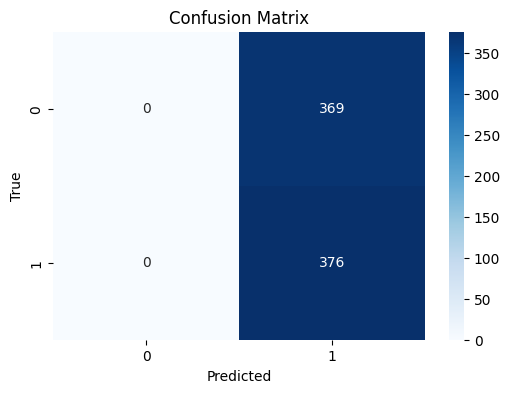

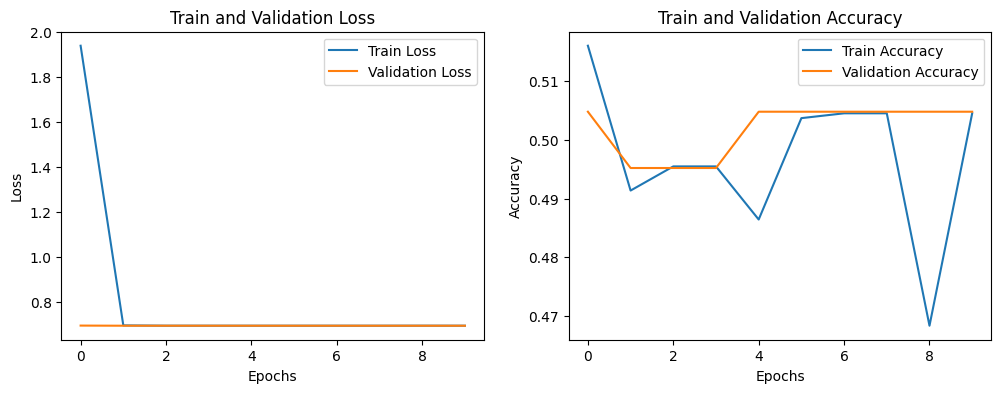

In [8]:
# Melatih model dengan 1 lapisan konvolusi
print("Model dengan 1 lapisan konvolusi")
model_1_layer = create_cnn_model(1)
train_and_evaluate_model(model_1_layer, X_train_rgb, y_train, X_val_rgb, y_val, X_test_rgb, y_test)


Model dengan 2 lapisan konvolusi


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.5211 - loss: 0.8443 - val_accuracy: 0.6910 - val_loss: 0.6216
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6738 - loss: 0.6208 - val_accuracy: 0.8234 - val_loss: 0.4533
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7515 - loss: 0.5107 - val_accuracy: 0.8311 - val_loss: 0.3963
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8255 - loss: 0.3989 - val_accuracy: 0.8445 - val_loss: 0.3760
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8369 - loss: 0.3691 - val_accuracy: 0.8695 - val_loss: 0.3270
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8567 - loss: 0.3320 - val_accuracy: 0.8791 - val_loss: 0.2977
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8861 - loss: 0.2755 - val_accuracy: 0.8714 - val_loss: 0.3312
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9290 - loss: 0.2021 - val_accuracy: 0.8906 - 

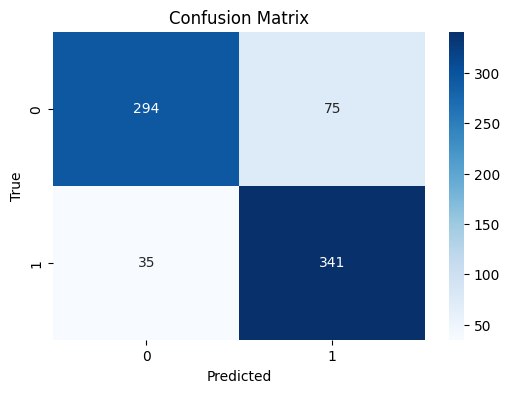

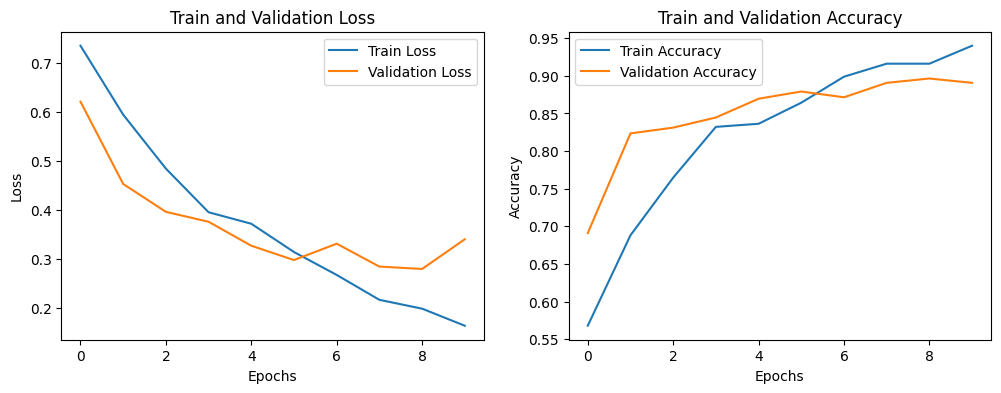

In [9]:
# Melatih model dengan 2 lapisan konvolusi
print("Model dengan 2 lapisan konvolusi")
model_2_layers = create_cnn_model(2)
train_and_evaluate_model(model_2_layers, X_train_rgb, y_train, X_val_rgb, y_val, X_test_rgb, y_test)


Model dengan 3 lapisan konvolusi


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.5242 - loss: 0.7017 - val_accuracy: 0.6411 - val_loss: 0.6701
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6101 - loss: 0.6518 - val_accuracy: 0.6430 - val_loss: 0.6001
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7056 - loss: 0.5450 - val_accuracy: 0.7965 - val_loss: 0.4729
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7738 - loss: 0.4900 - val_accuracy: 0.8196 - val_loss: 0.3949
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8304 - loss: 0.3897 - val_accuracy: 0.8618 - val_loss: 0.3637
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8181 - loss: 0.4055 - val_accuracy: 0.8695 - val_loss: 0.3458
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8607 - loss: 0.3227 - val_accuracy: 0.8887 - val_loss: 0.3022
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8793 - loss: 0.2899 - val_accuracy: 0.8829 - 

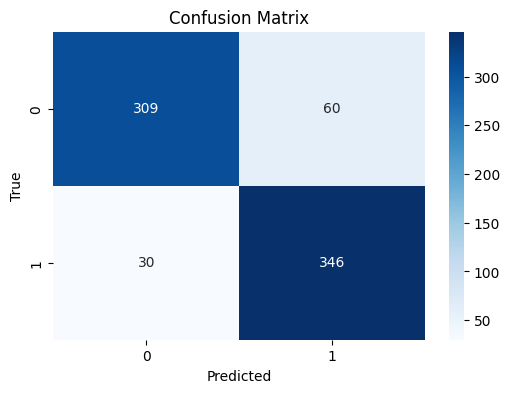

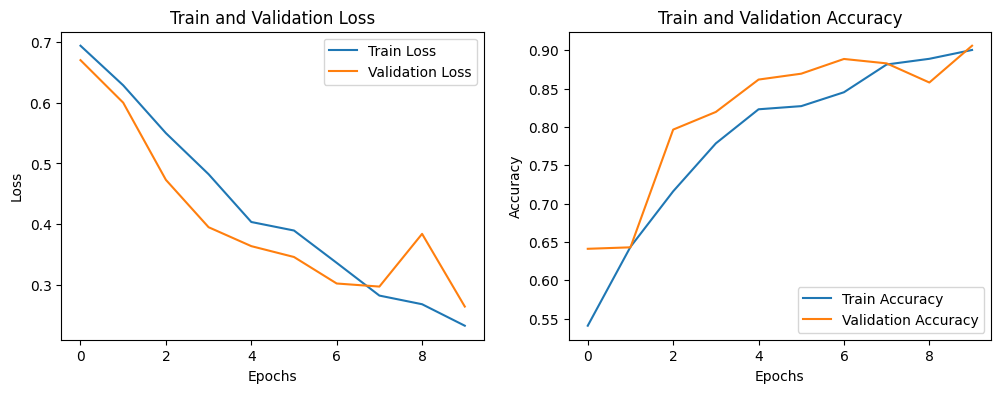

In [10]:
# Melatih model dengan 3 lapisan konvolusi
print("Model dengan 3 lapisan konvolusi")
model_3_layers = create_cnn_model(3)
train_and_evaluate_model(model_3_layers, X_train_rgb, y_train, X_val_rgb, y_val, X_test_rgb, y_test)